# PROJECT 1
Stanin Vladislav

### Importing requirements

In [75]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

### Function that rquires path, file extension and separator to parse all files in path and concate them all in one dataframe
For example, situation can happen, when files are with .txt file extension and separator in them is ','

In [2]:
def concat_files(path, separator, file_extension):
    all_files = glob.glob(f'{path}/*.{file_extension}')
    df = pd.concat([pd.read_table(file, sep=separator) for file in all_files])
    return df

#### Concating data about athletes

In [3]:
df = concat_files('../athlete_events', ',', 'csv')

In [4]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN
1,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Mixed 2 x 6 kilometres and 2 x 7.5 ki...,NaN
2,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 20 kilometres,NaN


## Checking the Data

#### Checking types of variables

In [5]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271115 entries, 0 to 22390
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271115 non-null  int64  
 1   Name    271114 non-null  object 
 2   Sex     271113 non-null  object 
 3   Age     261639 non-null  float64
 4   Height  210943 non-null  float64
 5   Weight  208239 non-null  float64
 6   Team    271112 non-null  object 
 7   NOC     271111 non-null  object 
 8   Games   271110 non-null  object 
 9   Year    271108 non-null  float64
 10  Season  271108 non-null  object 
 11  City    271108 non-null  object 
 12  Sport   271108 non-null  object 
 13  Event   271107 non-null  object 
 14  Medal   39782 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 33.1+ MB


#### Checking common statistics of variables

In [6]:
df.describe(include = 'all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,271115.000000,271114,271113,261639.000000,210943.000000,208239.000000,271112,271111,271110,271108.000000,271108,271108,271108,271107,39782
unique,NaN,134732,3,NaN,NaN,NaN,1184,231,53,NaN,2,42,67,766,3
top,NaN,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold
freq,NaN,58,196588,NaN,NaN,NaN,17847,18853,13820,NaN,222544,22425,38623,5731,13372
mean,68248.828641,NaN,NaN,25.557669,175.339760,70.702232,NaN,NaN,NaN,1978.378314,NaN,NaN,NaN,NaN,NaN
std,39022.303374,NaN,NaN,6.407296,10.524619,14.348878,NaN,NaN,NaN,29.877579,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.000000,7.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,34643.000000,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN
50%,68205.000000,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN
75%,102097.000000,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN


In [7]:
for i in ['Sex', 'Team', 'Games', 'Season', 'City', 'Sport', 'Medal']:
    print(df[i].unique())

['M' 'F' nan 'G']
['Kazakhstan' 'Ghana' 'Finland' ... 'Solos Carex' 'Dow Jones' 'Digby']
['2014 Winter' '1994 Winter' '1998 Winter' '2002 Winter' '2004 Summer'
 '2000 Summer' '1956 Winter' '1960 Winter' '2016 Summer' '1964 Winter'
 '1968 Winter' '1972 Winter' '1976 Winter' '2008 Summer' '2012 Summer'
 '1906 Summer' '1980 Summer' '1948 Summer' '1956 Summer' '1984 Summer'
 '1992 Summer' '1992 Winter' '1968 Summer' '1924 Summer' '2010 Winter'
 '1900 Summer' '1912 Summer' '1920 Summer' '1928 Summer' '1964 Summer'
 '1976 Summer' '1996 Summer' '1972 Summer' '1936 Summer' '1952 Summer'
 '1960 Summer' '1896 Summer' '1932 Winter' '1988 Summer' '1932 Summer'
 '1908 Summer' '1952 Winter' '1984 Winter' '2006 Winter' '1988 Winter'
 '1928 Winter' '1948 Winter' '1936 Winter' '1904 Summer' '1980 Winter'
 '1924 Winter' nan '2004 Summe' '2000 Su']
['Winter' 'Summer' nan]
['Sochi' 'Lillehammer' 'Nagano' 'Salt Lake City' 'Athina' 'Sydney'
 "Cortina d'Ampezzo" 'Squaw Valley' 'Rio de Janeiro' 'Innsbruck'
 '

_There are some deviations that are already visible_

#### Checking NULLs

In [8]:
df.isna().sum()

ID             0
Name           1
Sex            2
Age         9476
Height     60172
Weight     62876
Team           3
NOC            4
Games          5
Year           7
Season         7
City           7
Sport          7
Event          8
Medal     231333
dtype: int64

_Obviously some sportsmen did not have medals. Also we consider that some athletes did not measured their Height and Weight and did not wanted to say their age (maybe)_

#### Deleting sportsmen without name and sport, beacuse sportsmen could not be without sport 

In [9]:
df = df.drop(df.loc[df.Name.isnull()].index[0], axis=0)
df = df.drop(df.loc[df['Sport'].isnull()].index)

In [10]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9472
Height     60160
Weight     62863
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          1
Medal     231291
dtype: int64

#### Checking Event and Season and repair missed data 

In [11]:
df.loc[df['Event'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
22781,91137,Georgios Pantos,M,NaN,NaN,NaN,Athens-2,GRE,1906 Summer,1906.0,Summer,Athina,Footba,NaN,NaN


In [12]:
df.loc[df['Event'].isnull(), "Event"] = 'Football Men\'s Football'
df.loc[df['Event'].isnull(), "Sport"] = 'Football'

In [13]:
df.loc[df.Games == '2004 Summe', "Event"] = '2004 Summer'

In [14]:
df.loc[df.Games == '2000 Su', "Event"] = '2000 Summer'

#### Checking Sex

In [15]:
df['Sex'].value_counts().sort_index()

F     74512
G         2
M    196555
Name: Sex, dtype: int64

In [16]:
df.loc[df.Sex == 'G']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42,79609,Pavel Mike,G,22.0,182.0,79.0,Czechoslovakia,TCH,1972 Summer,1972.0,Summer,Munich,Handball,Handball Men's Handball,Silver
74,79630,Anatoly Mikhaylin,G,37.0,NaN,NaN,Russia,RUS,1996 Summer,1996.0,Summer,Atlanta,Sailing,Sailing Mixed Two Person Keelboat,NaN


_2 athletes turned out to be with gender "G" - with all my respect for minorities, I can't leave it this way, because in the years in which these athletes performed, gender-non-decided people did not perform (especially from Russia and Czechoslovakia). So i changed the sex according to their sports and names_

In [17]:
df.loc[df['Sex'] == 'G', 'Sex'] = 'M'

#### Checking Age

In [18]:
df['Age'].value_counts().sort_index()

10.0       1
11.0      13
12.0      39
13.0     187
14.0     837
        ... 
84.0       1
88.0       3
96.0       1
97.0       1
240.0      1
Name: Age, Length: 75, dtype: int64

In [19]:
df.loc[df.Age == 240]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
38,23459,Flicien Jules mile Courbet,M,240.0,NaN,NaN,Belgium,BEL,1912 Summer,1912.0,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN


_Too old... We have to change this data to NULL_

In [20]:
df.loc[df.Age == 240, 'Age'] = None

#### Checking Height

In [21]:
df['Height'].value_counts().sort_index()

127.0    7
128.0    1
130.0    2
131.0    2
132.0    9
        ..
220.0    6
221.0    4
223.0    4
226.0    3
340.0    1
Name: Height, Length: 96, dtype: int64

In [22]:
df.loc[df.Height == 340]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
227,23549,Kirsty Leigh Coventry (-Seward),F,28.0,340.0,64.0,Zimbabwe,ZIM,2012 Summer,2012.0,Summer,London,Swimming,Swimming Women's 200 metres Individual Medley,NaN


_It is to high!_

In [23]:
df.loc[df.Height == 340, 'Height'] = None

#### Checking Weight

In [24]:
df['Weight'].value_counts().sort_index()

25.0      6
28.0     14
30.0     42
31.0     23
32.0     41
         ..
180.0     1
182.0     2
190.0     1
198.0     1
214.0     2
Name: Weight, Length: 220, dtype: int64

_It is already okay_

## EDA

### The age of the youngest athletes of both sexes at the 1992 Olympics.

In [25]:
df.loc[df.Year == 1992].groupby('Sex').Age.min().to_frame()

,Age
Sex,
F,12.0
M,11.0


### The average value and standard deviation of the Height variable for athletes of each sex.

In [26]:
df.groupby('Sex').agg(Mean_value = ('Height', 'mean'),
                      Standard_deviation = ('Height', 'std'))

,Mean_value,Standard_deviation
Sex,,
F,167.839580,8.778888
M,178.858514,9.360484


### The average value and standard deviation of the Height variable for female tennis players at the 2000 Olympics.

In [27]:
df.loc[(df.Sex == 'F') & 
       (df.Sport == 'Tennis') & 
       (df.Year == 2000)].agg(Mean_value = ('Height', 'mean'), 
                              Standard_deviation = ('Height', 'std')).round(1)

,Height
Mean_value,171.8
Standard_deviation,6.5


### Heaviest athlete's sport in at the 2006 Olympics

In [200]:
print(f"Sport of heviest athlete: {(df.loc[(df.Weight == df.loc[df.Year == 2006].Weight.max()) & (df.Year == 2006)].Sport).reset_index().Sport[0]}")

Sport of heviest athlete: Skeleton


### Number of gold medals which were received by women from 1980 to 2010

In [29]:
df.loc[(df.Sex == "F") & (df.Medal == "Gold") & (df.Year.isin(range(1980,2011)))].Medal.count()

2249

### Number of times has John Aalberg participated in the Olympic Games in different years

In [30]:
diff_years = df.loc[df.Name == "John Aalberg"].Year.unique().size
all_times = df.loc[df.Name == "John Aalberg"].shape[0]
num_of_games = df.loc[df.Name == "John Aalberg"].Games.unique().size
print(f'Different years he participated: {diff_years}. Participated at different competitions: {all_times} times.')

Different years he participated: 2. Participated at different competitions: 8 times.


### The least and most represented (by number of participants) age groups of athletes at the 2008 Olympics. 
##### Age groups: [15-25), [25-35), [35-45), [45-55].

In [31]:
categories = pd.cut(df.loc[df.Year == 2008].Age,bins=(15,25,35,45,55), right= False)

ages_df = categories.value_counts().agg(['idxmax', 'idxmin']).reset_index().\
replace('idxmax', 'Most represented').replace('idxmin', 'Least represented').set_index('index')
ages_df.index.names = ['Most or least']
ages_df

,Age
Most or least,
Most represented,"[25, 35)"
Least represented,"[45, 55)"


### How much has the number of sports at the 2002 Olympics more compared to the 1994 Olympic Games

In [182]:
print(f" In 2002 Olympics there were {df.loc[df.Year == 2002].Sport.unique().size - df.loc[df.Year == 1994].Sport.unique().size} more sports then in 1994 Olympics")

 In 2002 Olympics there were 3 more sports then in 1994 Olympics


### The top 3 countries for each type of medals for the Winter and Summer Olympics

In [33]:
medal_top_df = df.groupby(['Season', "Medal", "NOC"]).NOC.count().sort_values(ascending=False).\
groupby(level=["Medal", "Season"]).head(3).sort_index(level=[0,1]).\
reindex(['Gold', 'Silver', "Bronze"], level=1).to_frame().rename(columns = {'NOC': 'Count'})
medal_top_df

Count
Season Medal  NOC       
Summer Gold   GBR    636
              URS    832
              USA   2472
       Silver GBR    729
              URS    635
              USA   1333
       Bronze GBR    620
              GER    649
              USA   1197
Winter Gold   CAN    305
              URS    250
              USA    166
       Silver CAN    199
              NOR    165
              USA    308
       Bronze FIN    215
              SWE    177
              USA    161

###  Height_z_scores variable with the values of the Height variable after its standardization

In [34]:
Height_z_scores = stats.zscore(df.Height.dropna())
Height_z_scores

0        1.108607
1        1.108607
2        1.108607
3        1.108607
4        1.393814
           ...   
22386    0.348056
22387    0.062849
22388    0.062849
22389    0.918469
22390    0.918469
Name: Height, Length: 210908, dtype: float64

### Height_min_max_scaled variable with the values of the Height variable after applying min-max normalization to it.
##### Optional

### Compared the height, weight and age of men and women who participated in the Winter Olympic Games. 
##### The results designed to use them for the article.

_As we have huge data (big amount of values), t-test could be applied_

In [148]:
t_height = stats.ttest_ind(df.loc[df.Sex == 'F', 'Height'].dropna(),
df.loc[df.Sex == 'M', 'Height'].dropna())
t_weight = stats.ttest_ind(df.loc[df.Sex == 'F', 'Weight'].dropna(),
df.loc[df.Sex == 'M', 'Weight'].dropna())
t_age = stats.ttest_ind(df.loc[df.Sex == 'F', 'Age'].dropna(),
df.loc[df.Sex == 'M', 'Age'].dropna())

Ttest_indResult(statistic=-271.5594369306357, pvalue=0.0)

In [160]:
new_df = df.loc[df.Season == 'Winter',['Sex','Height','Weight', 'Age']].groupby('Sex', as_index=False).agg(['min','mean', 'max', 'std', "count"]).round(2).transpose()
new_df = new_df.rename(columns = {'F':'Female', 'M':'Male'}, 
                       index = {'min':'Minimum value', 
                                'max':'Maximum value',
                                'std':'Standard deviation',
                                'mean':'Average value',
                                'count': "Total values"})
new_df.rename_axis()
new_df.rename_axis(["Characteristic", 'Statistics'], axis='index', inplace=True)
new_df.rename_axis("Sex of athlete:", axis="columns", inplace=True)

new_df['T-test'] = ''
new_df.loc[('Height', 'Average value'), 'T-test'] = f' Statistic = {t_height[0].round(2)}'
new_df.loc[('Weight', 'Average value'), 'T-test'] = f'Statistic = {t_weight[0].round(2)}'
new_df.loc[('Age', 'Average value'), 'T-test'] = f'Statistic = {t_age[0].round(2)}'

new_df.loc[('Height', 'Maximum value'), 'T-test'] = f'p-value = {t_height[1].round(2)}'
new_df.loc[('Weight', 'Maximum value'), 'T-test'] = f'p-value = {t_weight[1].round(2)}'
new_df.loc[('Age', 'Maximum value'), 'T-test'] = f'p-valuec = {t_age[1].round(2)}'

In [161]:

s1 = new_df.style.format(formatter={'Female': "{:.1f}", 'Male': "{:.1f}", 'T-test p-value': "{:.5f}"})
s1 = s1.set_table_styles([{'selector': 'th', 'props': 'text-align: center;'},
                    {'selector': 'th', 'props': 'text-align: center;'},
                    {'selector': '', 'props': 'border: 1px solid #000066;'},
                     {'selector': 'caption','props': 'caption-side: bottom; font-size:1.25em;'}],overwrite=False, axis=1)

s1.set_caption("Table 1. Height, Weight and Age of Male and Female athletes on winter olympics.")

for l0 in ['Height', 'Weight', 'Age']:
    s1 = s1.set_table_styles({(l0, 'Total values'): [{'selector': '', 'props': 'border-bottom: 2px solid black;'}], 
                        (l0, 'Minimum value'): [{'selector': '.level0', 'props': 'border-bottom: 2px solid black;'}],
                        (l0, 'Minimum value'): [{'selector': '.level0', 'props': 'border: 2px solid black;'}]},
                        overwrite=False, axis=1)

s1

##### Making tables for article

In [162]:
print(s1.to_latex(), file = open('../Tables for article/latex_table_with_style.txt', 'w'))
print(s1.to_latex(), file = open('../Tables for article/latex_table.txt', 'w'))
print(new_df.to_markdown(), file = open('../Tables for article/markdown_table.txt', 'w'))

### Let's compare Medal and Team variables

_Making top Teams with the most number of medals of all time_

In [40]:
medals = df.loc[df.Medal.notna()].groupby('NOC').Medal.count().reset_index().sort_values(by='Medal', ascending=False)
num_medals = df.loc[df.Medal == "Gold"].groupby('NOC').Medal.count().reset_index().\
sort_values(by='Medal', ascending=False).rename(columns = {'Medal': 'Number of medals'})
num_medals.head(10)

,NOC,Number of medals
103,USA,2638
101,URS,1082
39,GER,745
36,GBR,678
51,ITA,575
34,FRA,501
89,SWE,478
14,CAN,463
44,HUN,432
37,GDR,397


#### _Normalizing to number of unique events these countries participated_

In [41]:
num_sport = df.groupby('NOC').Sport.nunique()
num_sport_medals = num_medals.merge(num_sport, on='NOC').rename(columns={'Sport':'Number of sports participated'})
num_sport_medals

,NOC,Number of medals,Number of sports participated
0,USA,2638,58
1,URS,1082,37
2,GER,745,53
3,GBR,678,59
4,ITA,575,52
...,...,...,...
104,PAN,1,12
105,PER,1,26
106,SGP,1,16
107,PUR,1,30


In [42]:
num_sport_medals['Medal per sport'] = num_sport_medals['Number of medals']/num_sport_medals['Number of sports participated']

In [43]:
num_sport_medals = num_sport_medals.sort_values(by = 'Number of medals', ascending=False)
num_sport_medals

,NOC,Number of medals,Number of sports participated,Medal per sport
0,USA,2638,58,45.482759
1,URS,1082,37,29.243243
2,GER,745,53,14.056604
3,GBR,678,59,11.491525
4,ITA,575,52,11.057692
...,...,...,...,...
89,IOA,1,17,0.058824
88,VIE,1,15,0.066667
87,MOZ,1,5,0.200000
86,ECU,1,18,0.055556


##### Checking if we can make linear model

In [44]:
x=num_sport_medals['Number of medals']
y=num_sport_medals['Number of sports participated']

x = sm.add_constant(x)

_Deleting deviations accroding to cook's distances_

In [45]:
model = sm.OLS(y, x).fit()

In [46]:
cooks = model.get_influence().cooks_distance

In [47]:
df_wo_devs = num_sport_medals[cooks[1] > 0.05]

_Checking Homoscedacity using barlett and levene tests_

In [179]:
print('p-value for levene test is')
levene(df_wo_devs['Number of medals'],
df_wo_devs['Number of sports participated']).pvalue

p-value is


2.1864209486701103e-06

In [180]:
print('p-value for bartlett test is')
bartlett(df_wo_devs['Number of medals'],
df_wo_devs['Number of sports participated']).pvalue

p-value for bartlett test is


1.7914633204306004e-88

_Homoscedacity condition have not been approved_

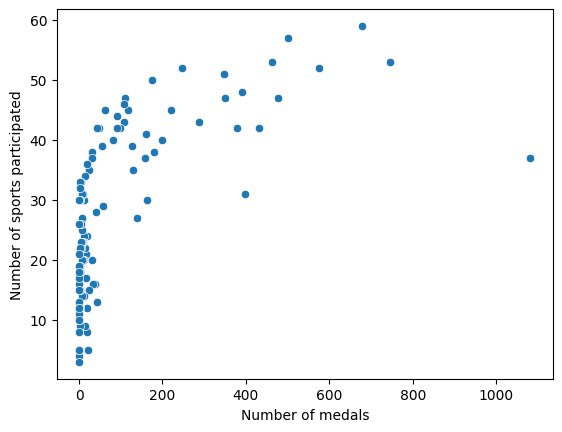

In [50]:
sns.scatterplot(x=df_wo_devs['Number of medals'], y=df_wo_devs['Number of sports participated']);

##### Let's see the plots

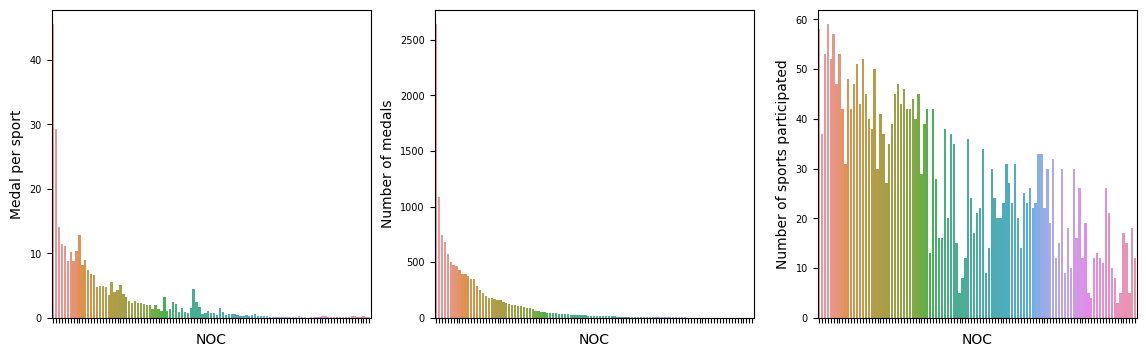

In [52]:
fig, ax = plt.subplots(1, 3, figsize = (14, 4))
sns.barplot(data=num_sport_medals, x='NOC', y='Medal per sport', ax = ax[0]);
ax[0].set(xticklabels=[]);
ax[0].tick_params(axis='y', which='major', labelsize=7)
sns.barplot(data=num_sport_medals, x='NOC', y='Number of medals', ax = ax[1]);
ax[1].set(xticklabels=[]);
ax[1].tick_params(axis='y', which='major', labelsize=7)
sns.barplot(data=num_sport_medals, x='NOC', y='Number of sports participated', ax = ax[2]);
ax[2].set(xticklabels=[]);
ax[2].tick_params(axis='y', which='major', labelsize=7)

We could not use correlation test, therefore we made 3 plots. All NOCs on plots sorted by Number of medals (you can see it on 2nd plot).  

As seen on 1st plot, it is a little bit similar to 2nd. However some NOCs have numbers of medals significantly greater then  number of sports they participated -> These NOCs are professionals in their sports. (It is peaks on 1st plot and gaps on 3rd plot)  

Low values of Medal per sport variable (on 1st plot) belong to some NOCs with high number of sports they participated (3rd plot). These NOCs tries a lot of different sports, but still have small number of medals.  

In common we can conclude that number of sports in which NOC participate could affect the number of medals they have. But there are some deviations, where some NOCs are professionals in their small amount of sports and NOCs that could not find they successufull sport  

## Some additional hypothesis

### Is the average number of medals in Women and Men significant?

In [69]:
m_medals = df.loc[(df.Sex == 'M') & (df.Medal.notnull())].groupby('Name').Medal.count()
f_medals = df.loc[(df.Sex == 'F') & (df.Medal.notnull())].groupby('Name').Medal.count()

In [70]:
f_medals.value_counts()

1     5264
2     1356
3      452
4      176
5       84
6       42
7       23
8       16
9       11
10       8
12       4
18       1
11       1
Name: Medal, dtype: int64

_Distribution is not normal, but number of values is still big_

In [71]:
m_medals.describe()

count    20763.000000
mean         1.373838
std          0.910985
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         28.000000
Name: Medal, dtype: float64

In [72]:
f_medals.describe()

count    7438.000000
mean        1.512907
std         1.101435
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        18.000000
Name: Medal, dtype: float64

_It is better to use another test (Mann-Whitney) since distribution significantly not normal_

In [177]:
mann = mannwhitneyu(m_medals, f_medals)
print(f'p-value is {mann.pvalue}')

p-value is 1.2534029820483311e-26


**Differences still significant.**

_I am not sexist. It were the most common tests that i vave in my mind with comparison of 2 groups_

### Is weights of swimmers is significantly differ from footballer's?

In [170]:
footbalers_weights = df.loc[(df.Sport == 'Football')].Weight.dropna()
swimmers_weights = df.loc[(df.Sport == 'Swimming')].Weight.dropna()

In [172]:
footbalers_weights.describe()

count    4532.000000
mean       70.447595
std         8.415428
min        28.000000
25%        65.000000
50%        71.000000
75%        76.000000
max       100.000000
Name: Weight, dtype: float64

In [173]:
swimmers_weights.describe()

count    18799.000000
mean        70.589127
std         11.332555
min         39.000000
25%         62.000000
50%         70.000000
75%         79.000000
max        114.000000
Name: Weight, dtype: float64

_There are almost no differences yet!_

In [202]:
print(f"p-value = {ttest_ind(swimmers_weights, footbalers_weights).pvalue}")

p-value = 0.42960031735443505


_They have the same weight! Is that mean that footballers would not drown..?_